<a href="https://colab.research.google.com/github/olley102/CommunityDetectionURSS/blob/main/performance_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Performance analysis

In [ ]:
!git clone https://github.com/olley102/CommunityDetectionURSS.git

Cloning into 'CommunityDetectionURSS'...
remote: Enumerating objects: 322, done.
remote: Counting objects: 100% (115/115), done.
remote: Compressing objects: 100% (76/76), done.
remote: Total 322 (delta 75), reused 76 (delta 38), pack-reused 207
Receiving objects: 100% (322/322), 8.17 MiB | 14.28 MiB/s, done.
Resolving deltas: 100% (170/170), done.


In [ ]:
import sys
sys.path.append('/content/CommunityDetectionURSS')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install rasterio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.3 MB 1.3 MB/s 


In [ ]:
import automate_project as app

In [ ]:
data_fp = '/content/drive/My Drive/GoogleEarthEngine/GPW_v411_pc_time{}.tif'
checkpoint_fp = '/content/checkpoints/checkpoint_{frame}_{epoch}.hdf5'

In [ ]:
proj = app.Project(data_fp, checkpoint_fp, 5)

In [ ]:
proj.load_data()

## 1. Autoencoder performance

The autoencoder's performance can be analysed via both its skill in encoding and reconstruction.

### 1.1 Reconstruction

We analyse the autoencoder's reconstruction performance by MSE and cosine similarity.

In [ ]:
import numpy as np
import image_processing as ip

In [ ]:
uv = ip.optical_flow.iteration(proj.images, 1, alpha=10, use_previous=True, centering=(0, 0, 0))

In [ ]:
proj.uv = uv

In [ ]:
image0 = np.dstack((proj.images[..., 0], np.moveaxis(uv[..., 0], 0, -1)))
image0 = np.clip(image0, None, 1000)
ae0 = ip.nn.WindowAE(window_size=(7, 7), num_channels=3)
ae0.auto_decoder_sizes((128, 64, 16))
ae0.make()
ae0.compile()
ae0.fit_transform(image0)
proj.autoencoders[0] = ae0

In [ ]:
image1 = np.dstack((proj.images[..., 1], np.moveaxis(uv[..., 1], 0, -1)))
image1 = np.clip(image1, None, 1000)
ae1 = ip.nn.WindowAE(window_size=(7, 7), num_channels=3)
ae1.auto_decoder_sizes((128, 64, 16))
ae1.make()
ae1.compile()
ae1.fit_transform(image1)
proj.autoencoders[1] = ae1

In [ ]:
proj.autoencoders[0].load_epoch('/content/drive/My Drive/Colab Notebooks/Files/checkpoint_{epoch}.hdf5', 200)
proj.autoencoders[1].load_epoch('/content/drive/My Drive/Colab Notebooks/Files/checkpoint_1_{epoch}.hdf5', 200)

True

In [ ]:
(pred0,) = proj.predict((0,))

Predicting pixels 0:11050
Predicting pixels 11050:22100
Predicting pixels 22100:33150
Predicting pixels 33150:44200
Predicting pixels 44200:55250
Predicting pixels 55250:66300
Predicting pixels 66300:77350
Predicting pixels 77350:88400
Predicting pixels 88400:99450
Predicting pixels 99450:110500
Predicting pixels 110500:121550
Predicting pixels 121550:132600
Predicting pixels 132600:143650
Predicting pixels 143650:154700
Predicting pixels 154700:165750
Predicting pixels 165750:176800
Predicting pixels 176800:187850
Predicting pixels 187850:198900
Predicting pixels 198900:209950
Predicting pixels 209950:221000
Predicting pixels 221000:232050
Predicting pixels 232050:243100
Predicting pixels 243100:254150
Predicting pixels 254150:265200
Predicting pixels 265200:276250
Predicting pixels 276250:287300
Predicting pixels 287300:298350
Predicting pixels 298350:309400
Predicting pixels 309400:320450
Predicting pixels 320450:331500
Predicting pixels 331500:342550
Predicting pixels 342550:353600

In [ ]:
(pred1,) = proj.predict((1,))

Predicting pixels 0:11050
Predicting pixels 11050:22100
Predicting pixels 22100:33150
Predicting pixels 33150:44200
Predicting pixels 44200:55250
Predicting pixels 55250:66300
Predicting pixels 66300:77350
Predicting pixels 77350:88400
Predicting pixels 88400:99450
Predicting pixels 99450:110500
Predicting pixels 110500:121550
Predicting pixels 121550:132600
Predicting pixels 132600:143650
Predicting pixels 143650:154700
Predicting pixels 154700:165750
Predicting pixels 165750:176800
Predicting pixels 176800:187850
Predicting pixels 187850:198900
Predicting pixels 198900:209950
Predicting pixels 209950:221000
Predicting pixels 221000:232050
Predicting pixels 232050:243100
Predicting pixels 243100:254150
Predicting pixels 254150:265200
Predicting pixels 265200:276250
Predicting pixels 276250:287300
Predicting pixels 287300:298350
Predicting pixels 298350:309400
Predicting pixels 309400:320450
Predicting pixels 320450:331500
Predicting pixels 331500:342550
Predicting pixels 342550:353600

In [ ]:
pred0.shape

(1796, 1105, 3)

In [ ]:
from numpy import linalg as LA

In [ ]:
def squared_error(x, y):
  return (x - y) ** 2

In [ ]:
def cosine_similarity(x, y):
  norm_x = x / LA.norm(x)
  norm_y = y / LA.norm(y)
  norm_x[np.isnan(norm_x)] = 0.0
  norm_y[np.isnan(norm_y)] = 0.0
  return np.dot(norm_x, norm_y)

In [ ]:
bins0, se_density0, mse0 = ip.analysis.performance_density(image0[..., 0], pred0[..., 0], 0, 1000, 200, measure=squared_error)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
mse0

413.303404922799

In [ ]:
rmse0 = np.sqrt(mse0)

In [ ]:
rmse0

20.32986485254634

Text(0.5, 1.0, 'Prediction')

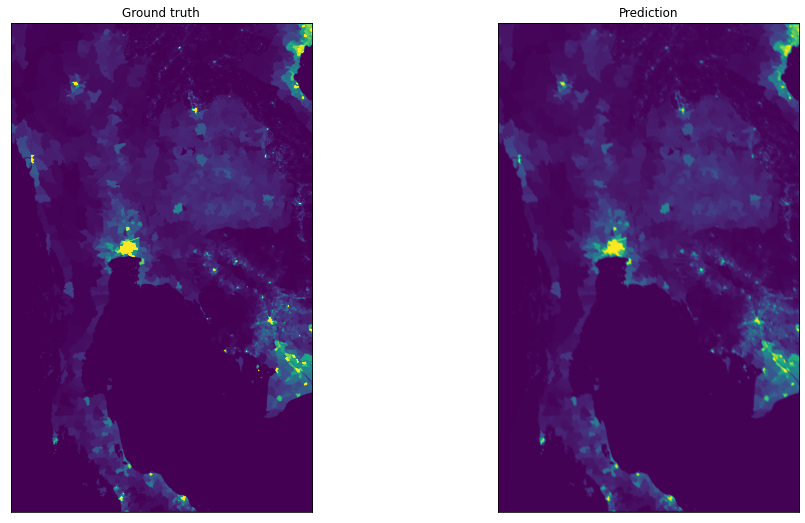

In [ ]:
fig = plt.figure(figsize=(16, 9))
ax1 = fig.add_subplot(121)
im1 = ax1.imshow(proj.images[..., 0], vmin=0, vmax=1000)
ax1.xaxis.set_visible(False)
ax1.yaxis.set_visible(False)
ax1.set_title('Ground truth')

ax2 = fig.add_subplot(122)
im2 = ax2.imshow(pred1[..., 0], vmin=0, vmax=1000)
ax2.xaxis.set_visible(False)
ax2.yaxis.set_visible(False)
ax2.set_title('Prediction')

In [ ]:
const_pred = np.median(image0[..., 0]) * np.ones_like(image0[..., 0])

In [ ]:
median = const_pred[0, 0]

In [ ]:
median

9.445194244384766

In [ ]:
bins0_const, se_density0_const, mse0_const = ip.analysis.performance_density(image0[..., 0], const_pred, 0, 1000, 200, measure=squared_error)

In [ ]:
interval = bins0[1] - bins0[0]

In [ ]:
im_size = image0.shape[0] * image0.shape[1]

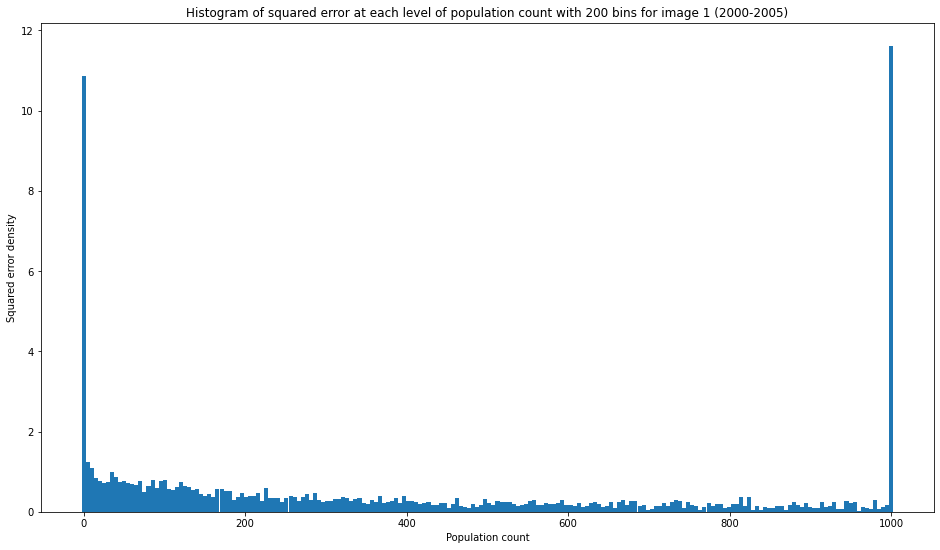

In [ ]:
fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot()
ax.bar(bins0, se_density0 / im_size, width=5, label='autoencoder reconstruction')
# ax.plot(bins0, se_density0_const / im_size, 'r--', label='constant median predictor')
ax.set_xlabel('Population count')
ax.set_ylabel('Squared error density')
ax.set_title('Histogram of squared error at each level of population count with 200 bins for image 1 (2000-2005)')
# ax.legend()
fig.savefig('se_density0_200')

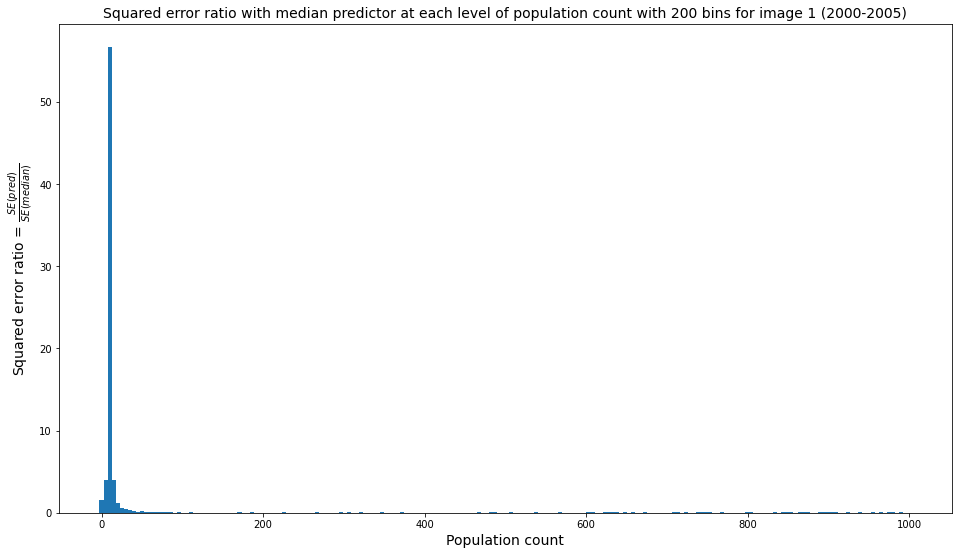

In [ ]:
fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot()
ax.bar(bins0, se_density0 / se_density0_const, width=5)
ax.set_xlabel('Population count', fontsize=14)
ax.set_ylabel('Squared error ratio = $\\frac{SE(pred)}{SE(median)}$', fontsize=14)
ax.set_title('Squared error ratio with median predictor at each level of population count with 200 bins for image 1 (2000-2005)', fontsize=14)
fig.savefig('se_median_ratio0_200')

In [ ]:
bins0_ratio, se_density0_ratio, mse0_ratio = ip.analysis.performance_density(image0[..., 0], const_pred, 0, 1000, 200, measure=squared_error_ratio)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


KeyboardInterrupt: ignored

In [ ]:
LA.norm(image0[..., 1:], axis=-1).max()

25.237994320526028

In [ ]:
bins0_sim, sim_density0, sim0 = ip.analysis.performance_density(image0[..., 1:], pred0[..., 1:], 0, 29, 60, measure=cosine_similarity)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


In [ ]:
sim0

-0.01817250009006157

Text(0.5, 1.0, 'Histogram of cosine similarity at each level of optical flow magnitude with 60 bins for image 1 (2000-2005)')

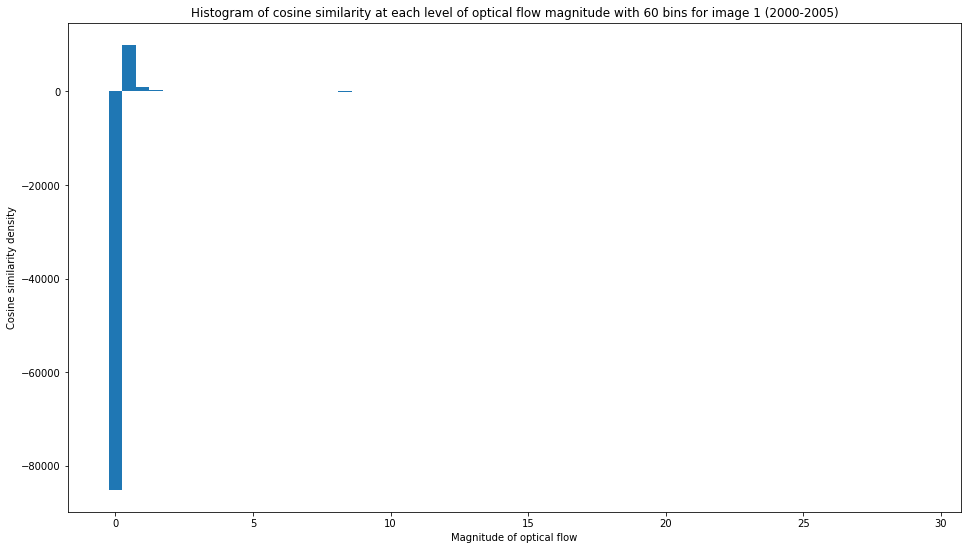

In [ ]:
fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot()
ax.bar(bins0_sim, sim_density0, width=0.5)
ax.set_xlabel('Magnitude of optical flow')
ax.set_ylabel('Cosine similarity density')
ax.set_title('Histogram of cosine similarity at each level of optical flow magnitude with 60 bins for image 1 (2000-2005)')

In [ ]:
mag0 = LA.norm(image0[..., 1:], axis=-1).flatten()

In [ ]:
p_mag0 = LA.norm(pred0[..., 1:], axis=-1).flatten()

In [ ]:
mag_bins = np.linspace(0, 10, 100)

(array([1.47747e+06, 4.01909e+05, 4.14140e+04, 1.92440e+04, 1.09930e+04,
        7.54800e+03, 4.06100e+03, 3.18200e+03, 2.59200e+03, 2.66700e+03,
        3.26800e+03, 1.23900e+03, 8.29000e+02, 1.83700e+03, 1.11200e+03,
        8.61000e+02, 9.82000e+02, 5.30000e+02, 7.54000e+02, 1.87000e+02,
        9.40000e+01, 3.70000e+01, 3.10000e+01, 2.40000e+01, 2.20000e+01,
        1.70000e+01, 2.20000e+01, 1.20000e+01, 1.30000e+01, 1.70000e+01,
        1.40000e+01, 9.00000e+00, 1.60000e+01, 1.70000e+01, 9.00000e+00,
        1.60000e+01, 5.10000e+01, 1.40000e+01, 4.40000e+01, 4.60000e+01,
        3.40000e+01, 1.19000e+02, 9.80000e+01, 9.55000e+02, 1.58000e+02,
        1.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 2.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00

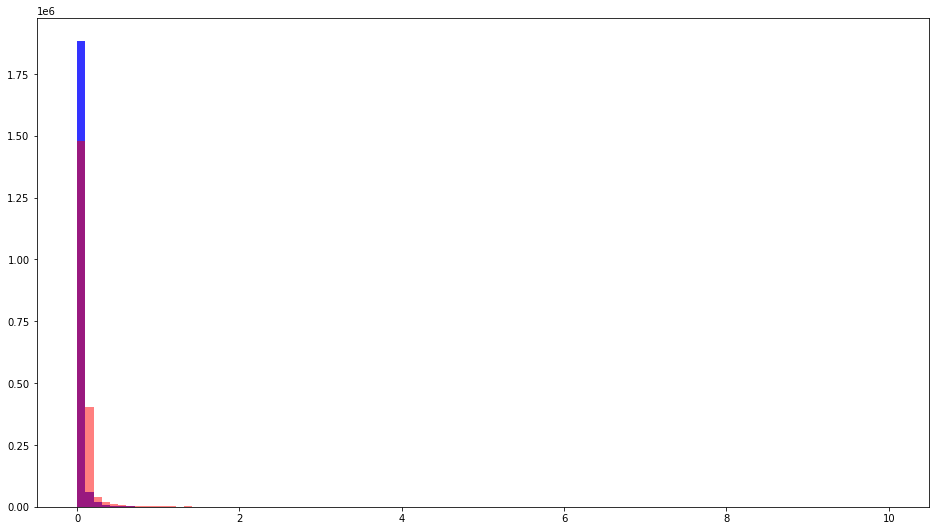

In [ ]:
fig = plt.figure(figsize=(16, 9))
plt.hist(mag0, bins=mag_bins, alpha=0.8, color='b')
plt.hist(p_mag0, bins=mag_bins, alpha=0.5, color='r')

In [ ]:
def mse(x, y):
  return np.mean((x - y) ** 2)

In [ ]:
bins0_uv, se_density0_uv, mse0_uv = ip.analysis.performance_density(image0[..., 1:], pred0[..., 1:], 0, 29, 200, measure=mse)

Text(0.5, 1.0, 'Histogram of squared error at each level of optical flow magnitude with 60 bins for image 1 (2000-2005)')

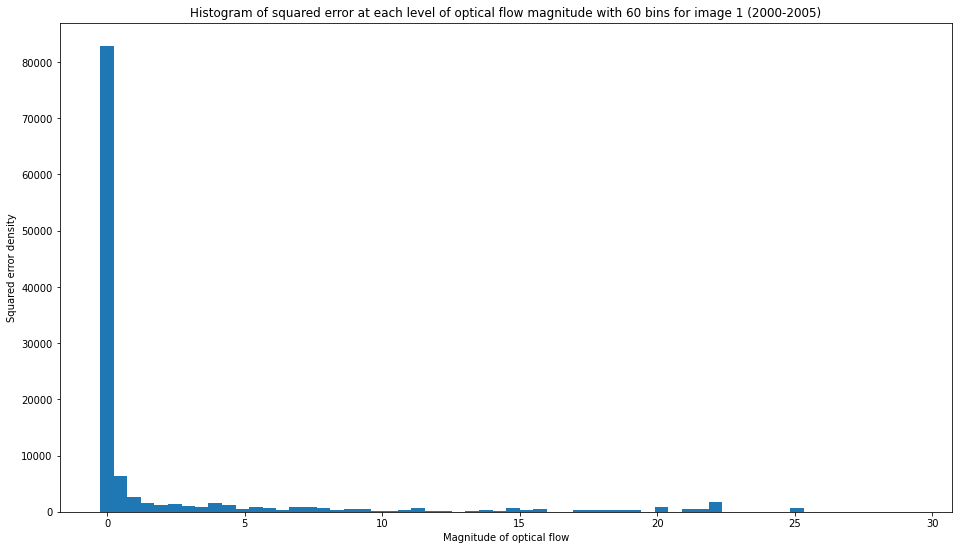

In [ ]:
fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot()
ax.bar(bins0_uv, se_density0_uv, width=0.5)
ax.set_xlabel('Magnitude of optical flow')
ax.set_ylabel('Squared error density')
ax.set_title('Histogram of squared error at each level of optical flow magnitude with 60 bins for image 1 (2000-2005)')

Text(0.5, 1.0, 'Histogram of squared error at each level of optical flow magnitude with 200 bins for image 1 (2000-2005)')

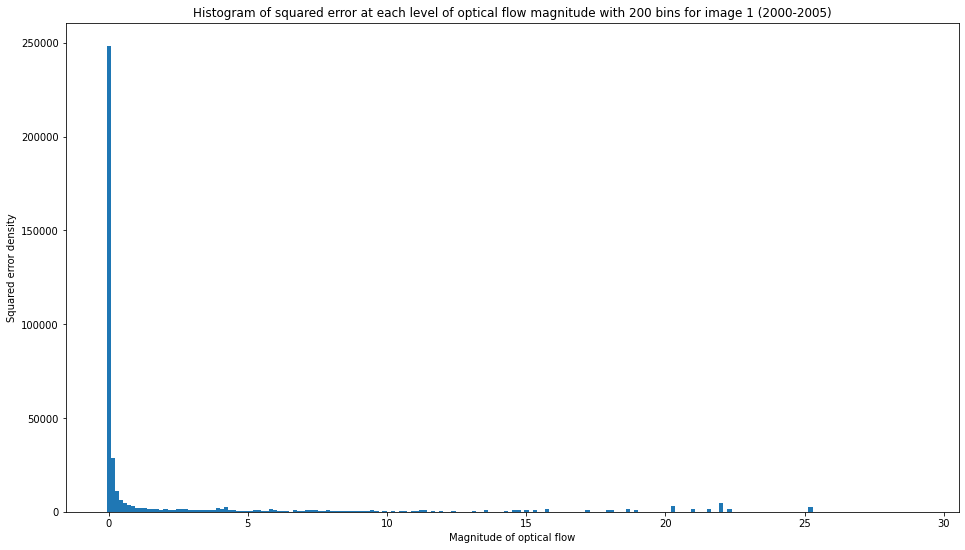

In [ ]:
fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot()
ax.bar(bins0_uv, se_density0_uv, width=30/200)
ax.set_xlabel('Magnitude of optical flow')
ax.set_ylabel('Squared error density')
ax.set_title('Histogram of squared error at each level of optical flow magnitude with 200 bins for image 1 (2000-2005)')

In [ ]:
mse0_uv

0.028847813285219927